<a href="https://colab.research.google.com/github/xinpen719/python-homework/blob/main/%E4%BD%9C%E6%A5%AD%E5%9B%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl
import csv
import openpyxl
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

csvfile = open('population.csv')    
raw_data = csv.reader(csvfile)     
data = list(raw_data)              

wb = openpyxl.Workbook()           
sheet = wb.create_sheet('csv')     
for i in data:
    sheet.append(i)                

wb.save('excel-read.xlsx')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


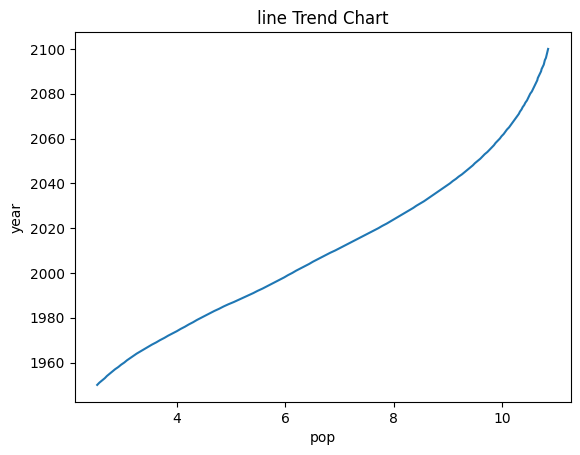

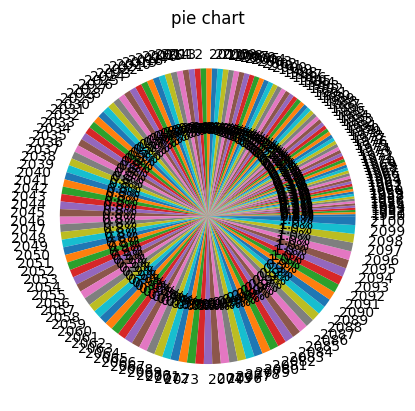

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('population.csv')
data.to_excel('excel-read.xlsx', index=False)
excel_data = pd.read_excel('population.xlsx')

plt.plot(excel_data['pop'], excel_data['year'])
plt.xlabel('pop')
plt.ylabel('year')
plt.title('line Trend Chart')
plt.show()

plt.pie(excel_data['pop'], labels=excel_data['year'], autopct='%1.1f%%')
plt.title('pie chart')
plt.show()
